#### Questão 1

João e Maria estão jogando RPG, um jogo de imaginação em que as regras do mundo são ditadas por jogadas de dados.

Em uma campanha, Maria encontra três itens que permitem aumentar os pontos de vida do jogador. Cada item vai aumentar o número obtido pela soma da jogada de diferentes dados, podendo ser dados de 4, 6, 8, 10 ou 12 faces. As regras para o cálculo do número de pontos de vida para cada item são:

 - Soma da jogada de 1 dado de 12 faces mais 1 dado de 10 faces. Se o resultado for menor que 7, adicionar 1 dado de 4 faces;
 - Soma da jogada de 2 dados de 6 faces e 2 dados de 4 faces. Se o resultado for menor que 7, adicionar 1 dado de 4 faces;
 - Soma da jogada de 6 dados de 4 faces. Se o resultado for menor que 7, adicionar 1 dado de 12 faces

João não sabe qual item escolher, então Maria decide calcular quais seriam os valores esperados e dispersão desses valores para cada um dos itens.

#### Instruções

Escreva um programa que simule a jogada de 10 mil dados e calcule a média e desvio-padrão para cadas uma das opções.

Construa um gráfico de barras para cada opção com o número de vezes que cada face foi lançada e ajude João escolher a melhor opção.

Item 1: 1 dado de 12 faces + 1 dado de 10 faces:
Média: 12.3142
Desvio Padrão 4.024335766309765


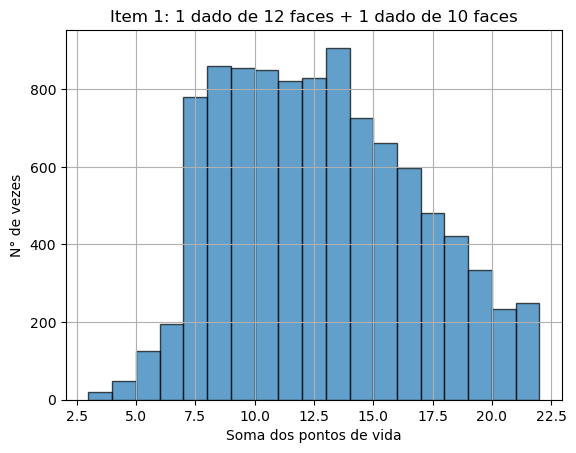

Item 2:  2 dados de 6 faces + 2 dados de 4 faces:
Média: 12.089
Desvio Padrão 2.767720903559461


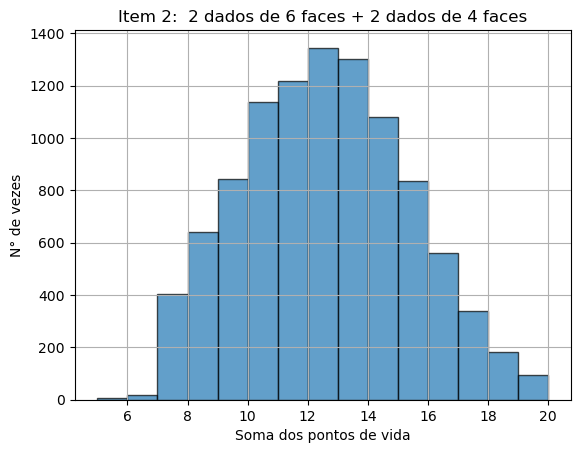

Item 3: 6 dados de 4 faces:
Média: 15.0315
Desvio Padrão 2.750728585302447


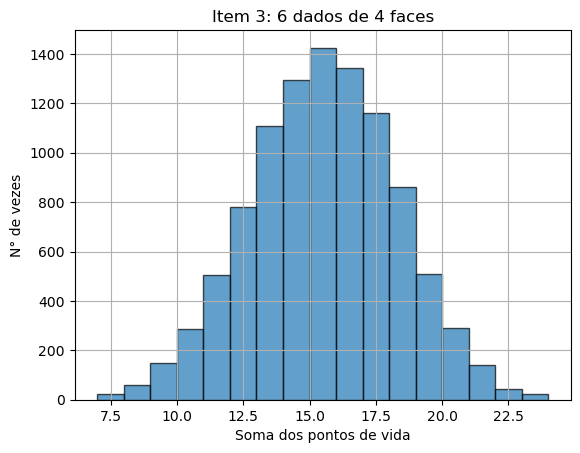

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def item1():
    resultados = []
    for i in range(10000):
        dado_12 = np.random.randint(1, 13) #simulação 12 e 10 jogadas 
        dado_10 = np.random.randint(1, 11)
        soma = dado_12 + dado_10
        if soma < 7: #add dado de 4 lados
            soma += np.random.randint(1, 5)
        resultados.append(soma)
    return resultados
def item2():
    resultados = []
    for i in range(10000):
        dado_6_1 = np.random.randint(1, 7) #simula dois dados de 6 e 2 dados de 4 lados
        dado_6_2 = np.random.randint(1, 7)
        dado_4_1 = np.random.randint(1, 5)
        dado_4_2 = np.random.randint(1, 5)
        soma = dado_6_1 + dado_6_2 + dado_4_1 + dado_4_2
        if soma < 7: #add dado de 4 lados
            soma += np.random.randint(1, 5)
        resultados.append(soma)
    return resultados
def item3():
    resultados = []
    for i in range(10000):
        soma = sum(np.random.randint(1, 5) for _ in range(6)) #6 dados de 4
        if soma < 7:
            soma += np.random.randint(1, 13)
        resultados.append(soma)
    return resultados

def grafico(resultados, titulo):
    media = np.mean(resultados)
    desvioP = np.std(resultados)
    print(f"{titulo}:\nMédia: {media}\nDesvio Padrão {desvioP}")

    plt.hist(resultados, bins=range(min(resultados), max(resultados) + 1), edgecolor='black', alpha=0.7)
    plt.title(titulo)
    plt.grid(True)
    plt.xlabel('Soma dos pontos de vida')
    plt.ylabel('N° de vezes')
    plt.show()

resultado1 = item1()
resultado2 = item2()
resultado3 = item3()

grafico(resultado1, "Item 1: 1 dado de 12 faces + 1 dado de 10 faces")
grafico(resultado2, "Item 2:  2 dados de 6 faces + 2 dados de 4 faces")
grafico(resultado3, "Item 3: 6 dados de 4 faces")

### Gráfico 1:
##### Distribuição: 
A distribuição tem uma forma aproximadamente simétrica, com uma leve concentração em torno de 10 e 12 pontos ( As chances de obter valores extremos são menores, pois a maior parte dos resultados está concentrada no meio da distribuição.)
##### Média: 
A média possui valor de ~= 12.312, o que indica que a soma mais provável ao jogar um dado de 12 faces e um de 10 faces é em torno de 10 e 12 pontos
##### Dado de 4 faces:
Como a soma pode ser pequena, há uma chance de que seja adicionada a soma de um dado de 4 faces quando o valor for inferior a 7. No gráfico, isso é mostrado nas colunas à esquerda (valores abaixo de 7), que são menos frequentes
### Gráfico 2:
##### Distribuição: 
A distribuição é centrada em torno de 12 e 14, com a maior parte dos resultados caindo nessa faixa
##### Média: 
A soma de 2 dados de 6 faces e 2 dados de 4 faces tende a ficar em torno de 12 e 14, que corresponde à faixa média dos resultados esperados
##### dado de 4 faces: 
Assim como no primeiro item, se a soma for inferior a 7, um dado adicional de 4 faces é jogado. No entanto, como temos mais dados sendo rolados aqui, é menos comum que a soma seja menor que 7
### Gráfico 3:
##### Distribuição: 
A distribuição é novamente simétrica, centrada em torno de 16 pontos, com a maioria dos resultados variando entre 14 e 18
#### Média: 
A soma média de 6 dados de 4 faces é em torno de 16, pois o valor esperado para um dado de 4 faces é 2,5, e com 6 jogadas a média da soma fica próxima de 16
##### dado de 12 faces: 
Quando a soma inicial é inferior a 7, um dado adicional de 12 faces é jogado, mas isso ocorre com menos frequência, como podemos ver pelos valores mais baixos no gráfico


### Conclusão:
##### Se João quiser maximizar seus pontos de vida sem correr muito risco por conta da variedade de resultados, o terceiro item é sua melhor opção, pois apresenta menos risco de valores extremos mas ainda apresenta uma média aceitável.


In [ ]:
#######################################################################################################################

#### Questão 2

Em um município do Brasil, sabe-se que  a idade dos habitantes não é conhecida, mas sabe-se que as seguintes faixas de idade seguem a seguinte distribuição de probabilidade:
 - 25% da população tem entre 0 e 12 anos
 - 50% da população tem entre 13 e 35 anos
 - 15% da população tem entre 35 e 55 anos
 - 10% da população tem mais de 56 anos

Sabendo que o município tem 50 mil habitantes, simule a distribuição de idades desse município. Obtenha os valores das idades de cada faixa e adicione-os a uma lista.


Para entender melhor a distribuição de probabilidade, obtenha um Histograma das idades obtidas no passo anterior, ou seja, um gráfico de barras em que cada barra reflete o número de vezes que o valor aparece no conjunto de dados.

#### Instruções

Calcule a média e desvio padrão desse conjunto de dados.

Por fim, obtenha 100 amostras de 100 pessoas desse município e calcule a média de cada amostra. Obtenha um Histograma para o conjunto de médias obtido.

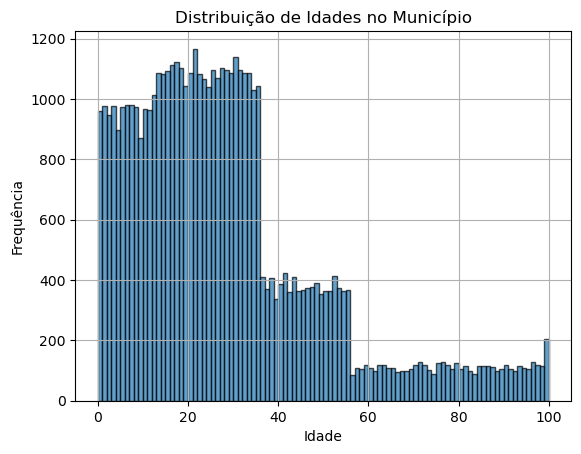

Média das idades: 28.06
Desvio padrão das idades: 21.65


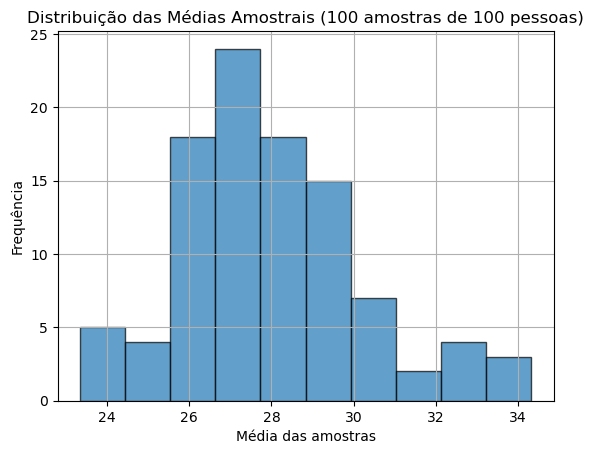

In [19]:
import numpy as np
import matplotlib.pyplot as plt

faixas = [(0, 12), (13, 35), (36, 55), (56, 100)]  
probabilidades = [0.25, 0.50, 0.15, 0.10] 
populacao = 50000

#dist de idades
idades = [] 
for i in range(populacao):
    faixa_idade = np.random.choice(len(faixas), p=probabilidades)
    idade = np.random.randint(faixas[faixa_idade][0], faixas[faixa_idade][1] + 1)
    idades.append(idade)
idades = np.array(idades)

#hist das idades
plt.hist(idades, bins=range(min(idades), max(idades) + 1), edgecolor='black', alpha=0.7)
plt.title('Distribuição de Idades no Município')
plt.xlabel('Idade')
plt.grid(True)
plt.ylabel('Frequência')
plt.show()

mediaIdades = np.mean(idades)
dpIdades = np.std(idades)

print(f"Média das idades: {mediaIdades:.2f}")
print(f"Desvio padrão das idades: {dpIdades:.2f}")

mediasAmostrais = []
for i in range(100):
    amostra = np.random.choice(idades, size=100, replace=False)
    mediasAmostrais.append(np.mean(amostra))

#hist das amostras
plt.hist(mediasAmostrais, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribuição das Médias Amostrais (100 amostras de 100 pessoas)')
plt.xlabel('Média das amostras')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


### Gráfico 1:
Mostra principalmente a distribuição das idades da população no geral. Como esperado, a faixa de 13-35 anos tem uma concentração muito maior, já que representa 50% da população.

### Gráfico 2:
##### distribuição: 
tem uma forma de sino, semelhante à distribuição normal, o que é consistente com o Teorema Central do Limite. Esse teorema afirma que, independentemente da forma da distribuição original (distribuição das idades), as médias amostrais tenderão a seguir uma distribuição normal conforme o tamanho das amostras aumenta.
##### médias:
das amostras estão concentradas entre 26 e 30 anos, com um pico por volta dos 28 anos. Isso sugere que a média da população simulada está próxima de 28 anos.
##### variações: 
Existem algumas variações menores (valores extremos) nas médias amostrais, mas elas são poucas e esperadas em uma simulação desse tipo.

### Questão 3

Em uma indústria farmacêutica aproximadamente 1% dos pacientes tratados com um novo remédio apresentam reação adversa. Considerando uma amostra de 2000 pacientes.
###
a) Qual a distribuição de probabilidades utilizadas para o cálculo de probabilidades para este teste. Justifique a sua resposta.
###
b) Calcule a probabilidade de 0 a 10 reações adversas (faça este cálculo pela distribuição Binomial e de Poisson e plote histogramas para cada um dos cálculos). Há diferença entre os valores encontrados? Em caso afirmativo, porque haveria esta diferença?
###
c) Baseado nos cálculos anteriores, o remédio é seguro?

### A)

##### Distribuição Binomial: 
É apropriada porque estamos considerando uma amostra de um número fixo de ensaios (n = 2000), onde cada paciente pode ou não ter uma reação adversa (sucesso ou falha). Para cada paciente, a probabilidade de reação adversa é 
𝑝
=
0.01
p=0.01. A binomial modela exatamente essa situação: uma série de ensaios de Bernoulli independentes, com dois resultados possíveis (reação adversa ou não).

##### Distribuição de Poisson: 
Esta distribuição também pode ser usada, pois quando a probabilidade de sucesso é pequena (1%) e o número de tentativas é grande (2000), a distribuição binomial pode ser aproximada pela distribuição de Poisson. Essa aproximação é válida quando 
𝑛
n é grande e 
𝑝
p é pequeno, e a média 
𝜇
μ pode ser aproximada por 
𝜇
=
𝑛
×
𝑝
μ=n×p.

A média esperada de reações adversas na amostra é 
𝜇
=
2000
×
0.01
=
20
μ=2000×0.01=20

pedi para o chat reescrever isso com as fórmulas e ficou um pouco mal formatado, mas dá para entender a ideia principal


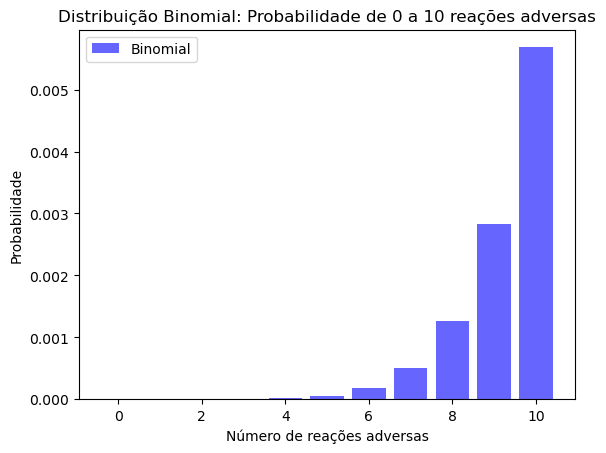

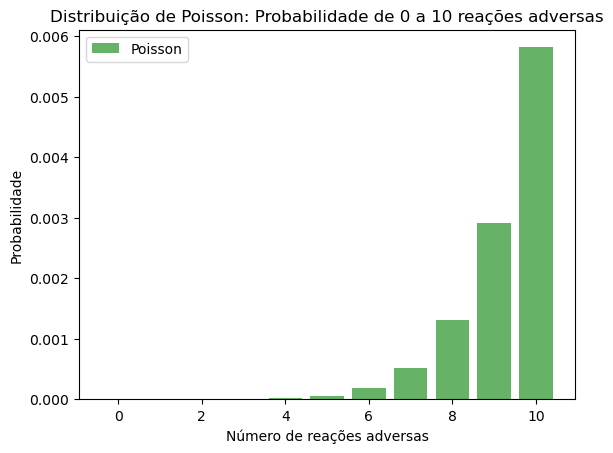

Reações adversas: 0, Binomial: 0.000000, Poisson: 0.000000
Reações adversas: 1, Binomial: 0.000000, Poisson: 0.000000
Reações adversas: 2, Binomial: 0.000000, Poisson: 0.000000
Reações adversas: 3, Binomial: 0.000003, Poisson: 0.000003
Reações adversas: 4, Binomial: 0.000013, Poisson: 0.000014
Reações adversas: 5, Binomial: 0.000052, Poisson: 0.000055
Reações adversas: 6, Binomial: 0.000175, Poisson: 0.000183
Reações adversas: 7, Binomial: 0.000503, Poisson: 0.000523
Reações adversas: 8, Binomial: 0.001265, Poisson: 0.001309
Reações adversas: 9, Binomial: 0.002827, Poisson: 0.002908
Reações adversas: 10, Binomial: 0.005686, Poisson: 0.005816


In [22]:
# B)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

n = 2000 
p = 0.01  
mu = n * p  

x = np.arange(0, 11)

probBinom = binom.pmf(x, n, p)

probPoisson = poisson.pmf(x, mu)

plt.bar(x, probBinom, color='blue', alpha=0.6, label='Binomial')
plt.title('Distribuição Binomial: Probabilidade de 0 a 10 reações adversas')
plt.xlabel('Número de reações adversas')
plt.ylabel('Probabilidade')
plt.legend()
plt.show()

plt.bar(x, probPoisson, color='green', alpha=0.6, label='Poisson')
plt.title('Distribuição de Poisson: Probabilidade de 0 a 10 reações adversas')
plt.xlabel('Número de reações adversas')
plt.ylabel('Probabilidade')
plt.legend()
plt.show()

for i in range(len(x)):
    print(f"Reações adversas: {x[i]}, Binomial: {probBinom[i]:.6f}, Poisson: {probPoisson[i]:.6f}")


# C)
Com base nos cálculos anteriores, podemos avaliar se o remédio é seguro ou não.

A probabilidade de termos até 10 reações adversas em uma amostra de 2000 pacientes é relativamente baixa, tanto pela distribuição binomial quanto pela de Poisson. Isso sugere que a chance de uma reação adversa é pequena para a maioria dos pacientes.
###
Contudo, para uma conclusão final sobre a segurança do remédio, outros fatores, como a gravidade das reações adversas, também devem ser considerados. Se as reações forem leves e a probabilidade de ocorrer é baixa, pode-se concluir que o remédio é seguro para uso.